In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import mplcursors
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("data.parquet")

# Economic mobility & college


## Data Description
We have identified the longitudinal economic mobility statistics as our dataset. It comes from this NGO called https://opportunityinsights.org/. The data comes in a series of flat files on economic mobility for different colleges along with a flat file on college attributes.

## Motivation

![](tweet.png)


## Economic Mobility

To do this analysis, we compared the quintiles of parental income to their children's income post college over a 10 year period.

**Income Quintiles**:
* Quintile 1: 0-20%
* Quintile 2: 20-40%
* Quintile 3: 40-60%
* Quintile 4: 60-80%
* Quintile 5: 80-100%



# Impact of College Attributes on Income

Text(0.5, 1.0, 'Sticker Price to Median Earnings (Corr 0.6172)')

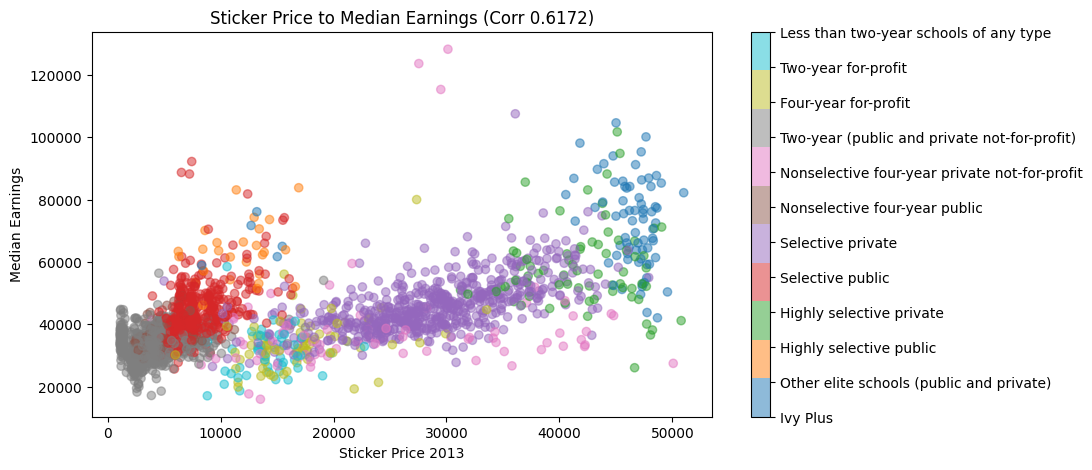

In [3]:
corr = df["sticker_price_2013"].corr(df["k_median_nozero"])
fig, ax = plt.subplots(figsize=[10, 5])
plt.scatter(df.sticker_price_2013, df.k_median_nozero, c=df.tier, cmap="tab10", alpha=0.5)
cbar = plt.colorbar()
t = df[["tier", "tier_name"]].drop_duplicates().sort_values("tier")
cbar.set_ticks(t.tier)
cbar.set_ticklabels(t.tier_name)
plt.xlabel("Sticker Price 2013")
plt.ylabel("Median Earnings")
plt.title(f"Sticker Price to Median Earnings (Corr {corr:.4f})")

Text(0.5, 1.0, 'Rejection Rate to Median Earnings (Corr 0.3780)')

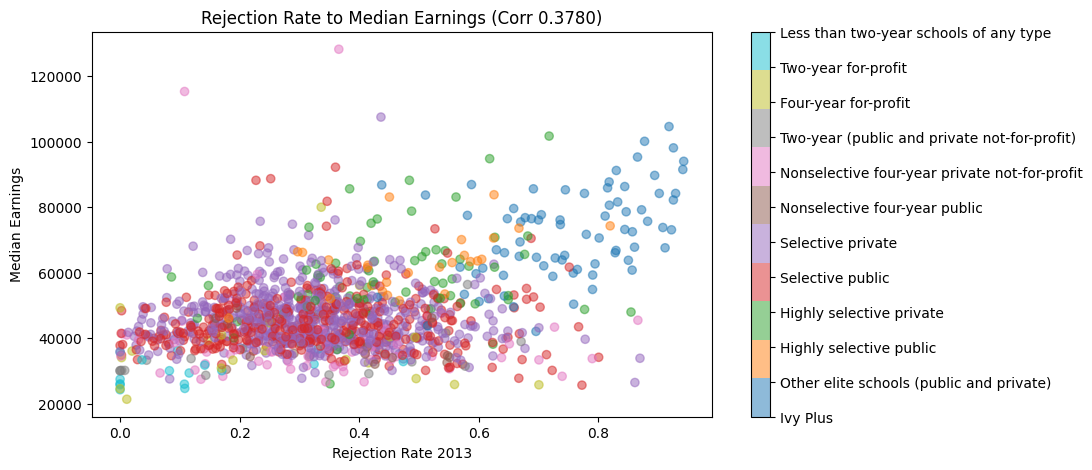

In [4]:
corr = df["scorecard_rej_rate_2013"].corr(df["k_median_nozero"])
fig, ax = plt.subplots(figsize=[10, 5])
plt.scatter(df.scorecard_rej_rate_2013, df.k_median_nozero, c=df.tier, cmap="tab10", alpha=0.5)
cbar = plt.colorbar()
t = df[["tier", "tier_name"]].drop_duplicates().sort_values("tier")
cbar.set_ticks(t.tier)
cbar.set_ticklabels(t.tier_name)
plt.xlabel("Rejection Rate 2013")
plt.ylabel("Median Earnings")
plt.title(f"Rejection Rate to Median Earnings (Corr {corr:.4f})")

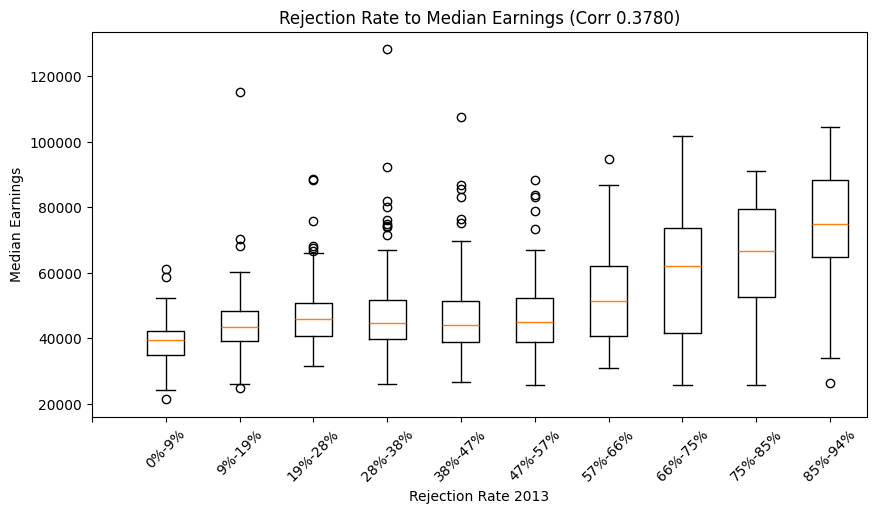

In [5]:
col = "scorecard_rej_rate_2013"
dep = "k_median_nozero"
fig, ax = plt.subplots(figsize=[10, 5])
bins = np.linspace(df[col].min(), df[col].max(), 11)
data = []
for s, e in zip(bins[:-1], bins[1:]):
    data.append(df.loc[(df[col] >= s) & (df[col] < e)][dep])
plt.boxplot(data)
plt.xticks(np.arange(len(data) + 1 ), ["",] + [f"{s:.0%}-{e:.0%}" for s, e in zip(bins[:-1],bins[1:])], rotation=45)
plt.xlabel("Rejection Rate 2013")
plt.ylabel("Median Earnings")
plt.title(f"Rejection Rate to Median Earnings (Corr {corr:.4f})")
pass

Text(0.5, 1.0, 'SAT Earnings to Median Earnings (Corr 0.7079)')

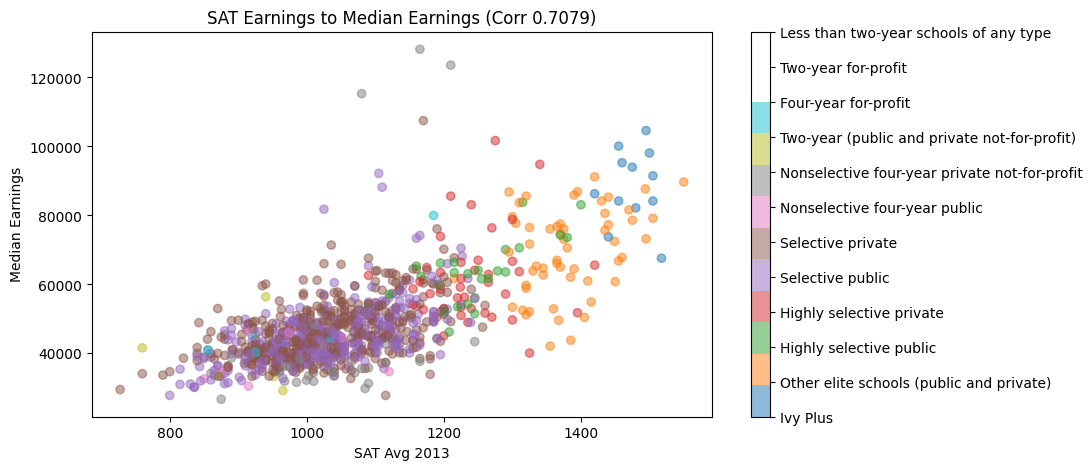

In [6]:
corr = df["sat_avg_2013"].corr(df["k_median_nozero"])
fig, ax = plt.subplots(figsize=[10, 5])
plt.scatter(df.sat_avg_2013, df.k_median_nozero, c=df.tier, cmap="tab10", alpha=0.5)
cbar = plt.colorbar()
t = df[["tier", "tier_name"]].drop_duplicates().sort_values("tier")
cbar.set_ticks(t.tier)
cbar.set_ticklabels(t.tier_name)
plt.xlabel("SAT Avg 2013")
plt.ylabel("Median Earnings")
plt.title(f"SAT Earnings to Median Earnings (Corr {corr:.4f})")

Text(0.5, 1.0, 'Median Parental Earnings to Median Earnings (Corr 0.7564)')

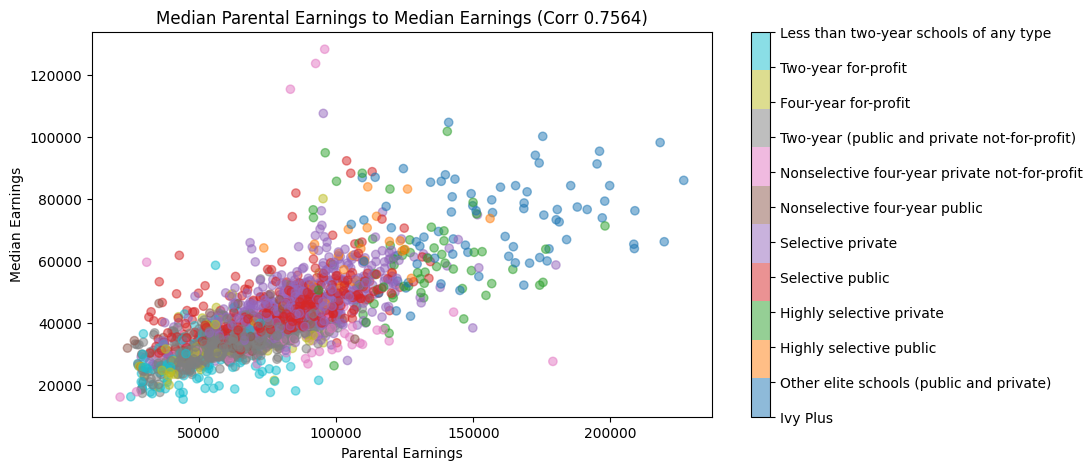

In [7]:
corr = df["par_median"].corr(df["k_median_nozero"])
fig, ax = plt.subplots(figsize=[10, 5])
plt.scatter(df.par_median, df.k_median_nozero, c=df.tier, cmap="tab10", alpha=0.5)
cbar = plt.colorbar()
t = df[["tier", "tier_name"]].drop_duplicates().sort_values("tier")
cbar.set_ticks(t.tier)
cbar.set_ticklabels(t.tier_name)
plt.xlabel("Parental Earnings")
plt.ylabel("Median Earnings")
plt.title(f"Median Parental Earnings to Median Earnings (Corr {corr:.4f})")

# Lifting out of Poverty

In [8]:
p = np.zeros(df.shape[0])
for i in range(3, 6):
    p += (df[f"kq{i}_cond_parq1"]).to_numpy()
df["prob_out_of_q1"] = p
df = df.sort_values("tier", ascending=False)
mod = smf.ols("prob_out_of_q1 ~ tier_name", data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         prob_out_of_q1   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     172.4
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          9.47e-287
Time:                        18:31:26   Log-Likelihood:                 2227.3
No. Observations:                2199   AIC:                            -4431.
Df Residuals:                    2187   BIC:                            -4362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      0.5802      0.010     58.146      0.000       0.561       0.600
tier_name[T.Highly selective private]                          0.1833      0.014     12.683      0.000       0.155       0.212
tier_name[T.Highly selective public]                           0.2062      0.020     10.331      0.000       0.167       0.245
tier_name[T.Ivy Plus]                                          0.2058      0.027      7.532      0.000       0.152       0.259
tier_name[T.Less than two-year schools of any type]           -0.1187      0.016     -7.244      0.000      -0.151      -0.087
tier_name[T.Nonselective four-year private not-for-profit]     0.0201      0.014      1.430      0.153      -0.007       0.048
tier_name[T.Nonselective four-year public]                     0.0131      0.014      0.913      0.361      -0.015       0.041
tier_name[T.Other elite schools (public and private)]          0.1997      0.015     13.439      0.000       0.171       0.229
tier_name[T.Selective private]                                 0.1309      0.011     12.319      0.000       0.110       0.152
tier_name[T.Selective public]                                  0.1222      0.011     11.146      0.000       0.101       0.144
tier_name[T.Two-year (public and private not-for-profit)]     -0.0217      0.011     -2.064      0.039      -0.042      -0.001
tier_name[T.Two-year for-profit]                              -0.0126      0.014     -0.872      0.383      -0.041       0.016
==============================================================================
Omnibus:                      169.331   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              624.150
Skew:                          -0.310   Prob(JB):                    2.93e-136
Kurtosis:                       5.535   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Probability of Moving from Q1 to Q3+')

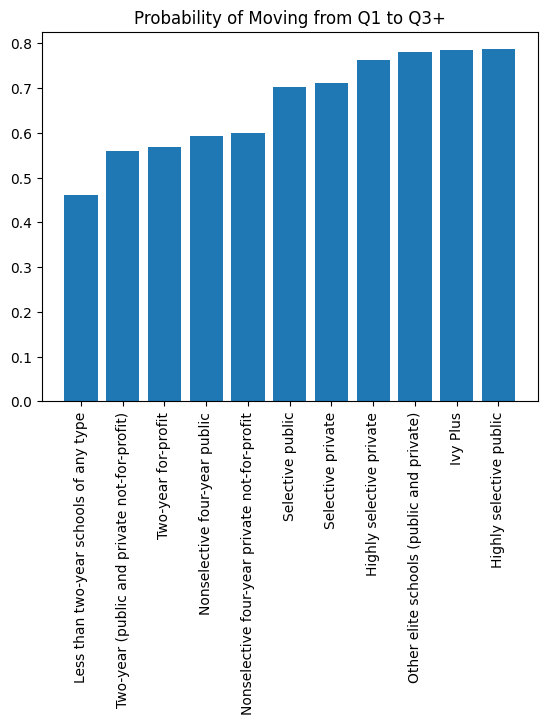

In [9]:
t = mod.params
t2 = t + t.iloc[0]
t2 = t2.iloc[1:]
t2 = t2.sort_values()
t2.index = [s.split(".")[-1].strip("]") for s in t2.index]
plt.bar(t2.index, t2)
plt.xticks(rotation=90)
plt.title("Probability of Moving from Q1 to Q3+")

Text(0.5, 1.0, 'Sticker Price to Probability of Leaving Poverty (Corr 0.5206)')

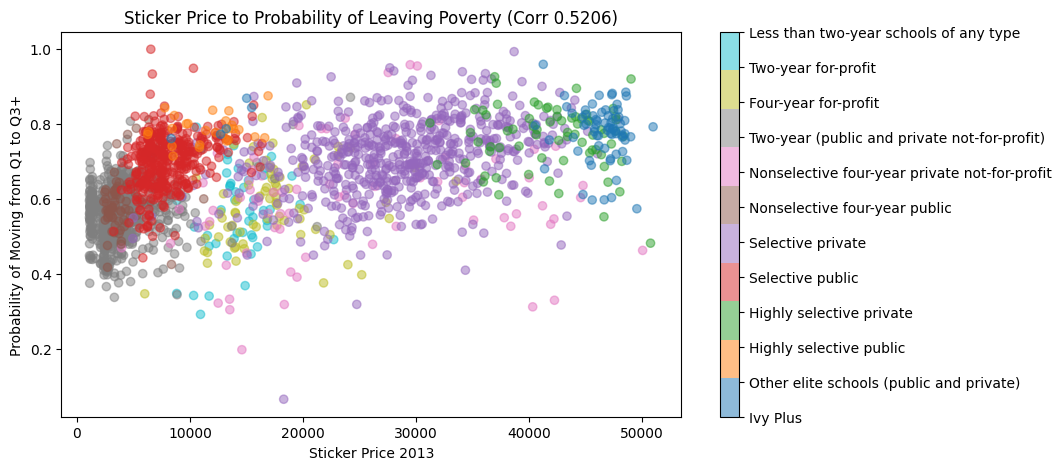

In [10]:
corr = df["sticker_price_2013"].corr(df["prob_out_of_q1"])
fig, ax = plt.subplots(figsize=[10, 5])
plt.scatter(df.sticker_price_2013, df.prob_out_of_q1, c=df.tier, cmap="tab10", alpha=0.5)
cbar = plt.colorbar()
t = df[["tier", "tier_name"]].drop_duplicates().sort_values("tier")
cbar.set_ticks(t.tier)
cbar.set_ticklabels(t.tier_name)
plt.xlabel("Sticker Price 2013")
plt.ylabel("Probability of Moving from Q1 to Q3+")
plt.title(f"Sticker Price to Probability of Leaving Poverty (Corr {corr:.4f})")

Text(0.5, 1.0, 'Net Price to Probability of Leaving Poverty (Corr 0.2774)')

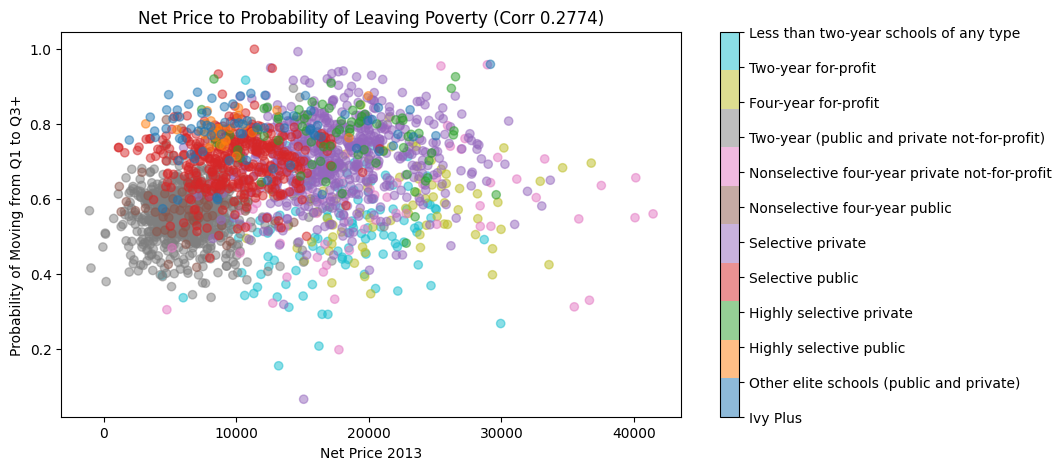

In [11]:
corr = df["scorecard_netprice_2013"].corr(df["prob_out_of_q1"])
fig, ax = plt.subplots(figsize=[10, 5])
plt.scatter(df.scorecard_netprice_2013, df.prob_out_of_q1, c=df.tier, cmap="tab10", alpha=0.5)
cbar = plt.colorbar()
t = df[["tier", "tier_name"]].drop_duplicates().sort_values("tier")
cbar.set_ticks(t.tier)
cbar.set_ticklabels(t.tier_name)
plt.xlabel("Net Price 2013")
plt.ylabel("Probability of Moving from Q1 to Q3+")
plt.title(f"Net Price to Probability of Leaving Poverty (Corr {corr:.4f})")

# Moving up in the World

In [12]:
df = df.sort_values("tier", ascending=False)
t = smf.ols("mr_kq5_pq1 ~ C(tier_name):C(region)", data=df).fit().summary()
t

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mr_kq5_pq1   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     7.437
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.23e-43
Time:                        18:31:27   Log-Likelihood:                 6570.0
No. Observations:                2199   AIC:                        -1.304e+04
Df Residuals:                    2151   BIC:                        -1.277e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      0.0239      0.003      8.223      0.000       0.018       0.030
C(region)[T.2]                                                                -0.0101      0.004     -2.433      0.015      -0.018      -0.002
C(region)[T.3]                                                                -0.0074      0.004     -1.831      0.067      -0.015       0.001
C(region)[T.4]                                                                -0.0086      0.004     -2.233      0.026      -0.016      -0.001
C(tier_name)[T.Highly selective private]:C(region)[1]                         -0.0047      0.004     -1.245      0.213      -0.012       0.003
C(tier_name)[T.Highly selective public]:C(region)[1]                           0.0118      0.005      2.155      0.031       0.001       0.023
C(tier_name)[T.Ivy Plus]:C(region)[1]                                         -0.0022      0.005     -0.434      0.664      -0.012       0.008
C(tier_name)[T.Less than two-year schools of any type]:C(region)[1]           -0.0086      0.005     -1.869      0.062      -0.018       0.000
C(tier_name)[T.Nonselective four-year private not-for-profit]:C(region)[1]     0.0075      0.004      1.890      0.059      -0.000       0.015
C(tier_name)[T.Nonselective four-year public]:C(region)[1]                     0.0028      0.006      0.485      0.628      -0.009       0.014
C(tier_name)[T.Other elite schools (public and private)]:C(region)[1]         -0.0049      0.004     -1.347      0.178      -0.012       0.002
C(tier_name)[T.Selective private]:C(region)[1]                                -0.0026      0.003     -0.848      0.397      -0.009       0.003
C(tier_name)[T.Selective public]:C(region)[1]                                  0.0054      0.003      1.663      0.096      -0.001       0.012
C(tier_name)[T.Two-year (public and private not-for-profit)]:C(region)[1]     -0.0061      0.003     -1.947      0.052      -0.012    4.25e-05
C(tier_name)[T.Two-year for-profit]:C(region)[1]                              -0.0004      0.004     -0.103      0.918      -0.008       0.007
C(tier_name)[T.Highly selective private]:C(region)[2]                          0.0017      0.004      0.393      0.694      -0.007       0.010
C(tier_name)[T.Highly selective public]:C(region)[2]                           0.0004      0.007      0.064      0.949      -0.013       0.014
C(tier_name)[T.Ivy Plus]:C(region)[2]                                          0.0057      0.013      0.446      0.656      -0.019       0.031
C(tier_name)[T.Less than two-year schools of any type]:C(region)[2]           -0

Text(0.5, 1.0, 'Probability of Moving from Q1 to Q5')

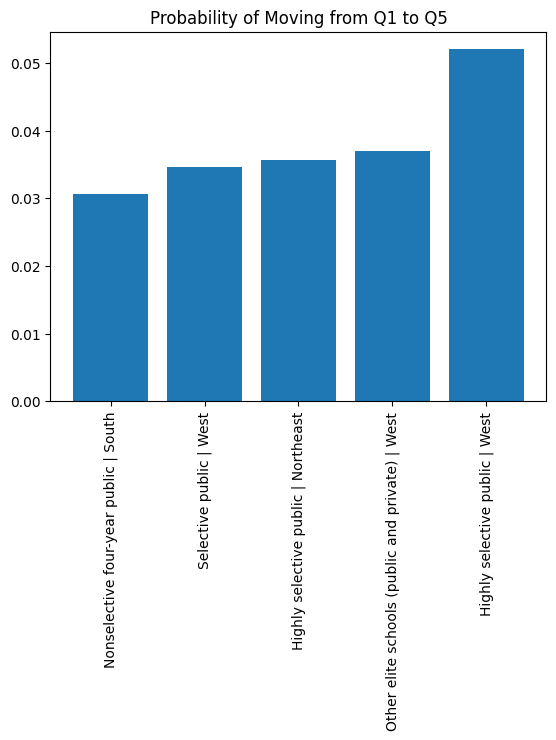

In [13]:
p_vals = t.tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
valid = p_vals.loc[p_vals.p_val <= 0.05]
valid = valid.loc[valid.index.astype(str).str.contains("tier_name")]
valid.index = [x.split(".")[-1].split("]")[0] + " | " + x.split("[")[-1].split("]")[0] for x in valid.index.astype(str)]
valid.index = valid.index.str.replace("1", "Northeast").str.replace("3", "South").str.replace("4", "West")
valid = valid["coef"].astype(str).astype(float)
valid = valid + p_vals["coef"].astype(str).astype(float).iloc[0]
valid = valid.sort_values()

plt.bar(valid.index, valid)
plt.xticks(rotation=90)
plt.title("Probability of Moving from Q1 to Q5")

# Why Diversity Matters

In [14]:
regression = smf.ols('mr_kq5_pq1  ~  scorecard_netprice_2013 + endowment_pc_2000  +asian_or_pacific_share_fall_2000 + black_share_fall_2000 + hisp_share_fall_2000  + alien_share_fall_2000 +pct_arthuman_2000 +pct_business_2000 +pct_publicsocial_2000 +pct_stem_2000 +pct_socialscience_2000 +pct_tradepersonal_2000 + public +scorecard_rej_rate_2013 + C(hbcu)' , data=df).fit()
p_vals = regression.summary().tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
p_vals = p_vals.loc[p_vals.p_val <= 0.05]
p_vals.coef = p_vals.coef.astype(str).astype(float)
p_vals = p_vals.sort_values("coef", ascending=False)
p_vals["coef"].apply(lambda x: f"{x:.2%}").to_frame("Increase in Probability from Q1 to Q5")

,Increase in Probability from Q1 to Q5
col,
alien_share_fall_2000,8.82%
hisp_share_fall_2000,7.48%
asian_or_pacific_share_fall_2000,4.69%
black_share_fall_2000,3.21%
Intercept,0.52%
public,0.52%
pct_tradepersonal_2000,0.05%
pct_stem_2000,0.01%
endowment_pc_2000,-0.00%


# Moving up at All

In [15]:
p = np.zeros(df.shape[0])
for i in range(1, 6):
    for j in range(1, i):
        p += (df[f"kq{i}_cond_parq{j}"] * df[f"par_q{j}"]).to_numpy()
df["prob_higher_q_than_p"] = p

p = np.zeros(df.shape[0])
for i in range(1, 6):
    j = i
    p += (df[f"kq{i}_cond_parq{j}"] * df[f"par_q{j}"]).to_numpy()
df["prob_same_q_for_k_and_p"] = p

p = np.zeros(df.shape[0])
for i in range(1, 6):
    for j in range(i + 1, 6):
        p += (df[f"kq{i}_cond_parq{j}"] * df[f"par_q{j}"]).to_numpy()
df["prob_lower_q_than_p"] = p

df = df.sort_values("tier", ascending=False)
t = smf.ols("prob_higher_q_than_p ~ tier_name", data=df).fit().summary()
t

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     prob_higher_q_than_p   R-squared:                       0.182
Model:                              OLS   Adj. R-squared:                  0.178
Method:                   Least Squares   F-statistic:                     44.24
Date:                  Tue, 23 Apr 2024   Prob (F-statistic):           1.71e-87
Time:                          18:31:27   Log-Likelihood:                 2318.7
No. Observations:                  2199   AIC:                            -4613.
Df Residuals:                      2187   BIC:                            -4545.
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      0.4039      0.010     42.199      0.000       0.385       0.423
tier_name[T.Highly selective private]                         -0.1325      0.014     -9.558      0.000      -0.160      -0.105
tier_name[T.Highly selective public]                          -0.0688      0.019     -3.596      0.000      -0.106      -0.031
tier_name[T.Ivy Plus]                                         -0.1792      0.026     -6.837      0.000      -0.231      -0.128
tier_name[T.Less than two-year schools of any type]           -0.0294      0.016     -1.868      0.062      -0.060       0.001
tier_name[T.Nonselective four-year private not-for-profit]    -0.0612      0.013     -4.536      0.000      -0.088      -0.035
tier_name[T.Nonselective four-year public]                    -0.0003      0.014     -0.024      0.980      -0.027       0.027
tier_name[T.Other elite schools (public and private)]         -0.1650      0.014    -11.573      0.000      -0.193      -0.137
tier_name[T.Selective private]                                -0.0410      0.010     -4.019      0.000      -0.061      -0.021
tier_name[T.Selective public]                                 -0.0102      0.011     -0.968      0.333      -0.031       0.010
tier_name[T.Two-year (public and private not-for-profit)]     -0.0041      0.010     -0.407      0.684      -0.024       0.016
tier_name[T.Two-year for-profit]                               0.0424      0.014      3.070      0.002       0.015       0.070
==============================================================================
Omnibus:                      121.731   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.059
Skew:                           0.542   Prob(JB):                     9.57e-34
Kurtosis:                       3.695   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Probability of Moving to a Higher Q than Parents')

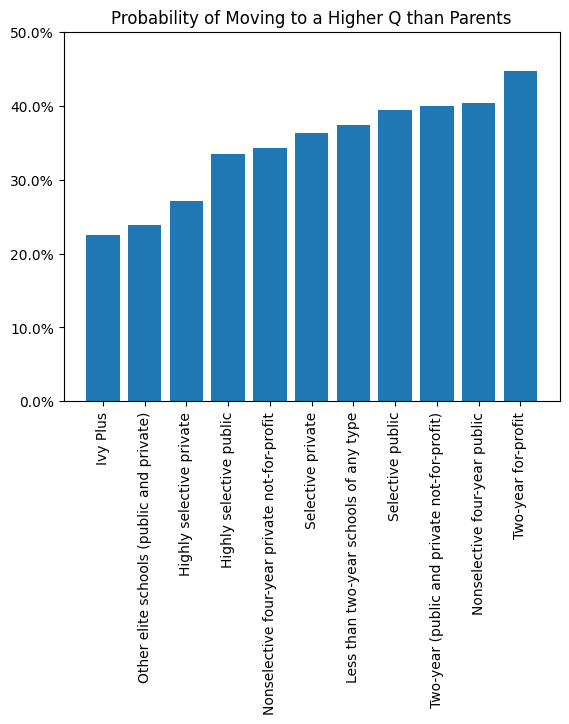

In [16]:
p_vals = t.tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
#valid = p_vals.loc[p_vals.p_val <= 0.05]
valid = p_vals
valid = valid.loc[valid.index.astype(str).str.contains("tier_name")]
valid.index = [x.split(".")[-1].split("]")[0]  for x in valid.index.astype(str)]
valid = valid["coef"].astype(str).astype(float)
valid = valid + p_vals["coef"].astype(str).astype(float).iloc[0]
valid = valid.sort_values()

plt.bar(valid.index, valid)
plt.xticks(rotation=90)
ticks = plt.yticks()
plt.yticks(ticks[0], [f"{x:.1%}" for x in ticks[0]])
plt.title("Probability of Moving to a Higher Q than Parents")

In [17]:
df = df.sort_values("tier", ascending=False)
t = smf.ols("prob_same_q_for_k_and_p ~ tier_name", data=df).fit().summary()
t

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     prob_same_q_for_k_and_p   R-squared:                       0.566
Model:                                 OLS   Adj. R-squared:                  0.564
Method:                      Least Squares   F-statistic:                     259.2
Date:                     Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                             18:31:28   Log-Likelihood:                 4089.6
No. Observations:                     2199   AIC:                            -8155.
Df Residuals:                         2187   BIC:                            -8087.
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      0.2330      0.004     54.460      0.000       0.225       0.241
tier_name[T.Highly selective private]                          0.1160      0.006     18.714      0.000       0.104       0.128
tier_name[T.Highly selective public]                           0.1216      0.009     14.214      0.000       0.105       0.138
tier_name[T.Ivy Plus]                                          0.2628      0.012     22.430      0.000       0.240       0.286
tier_name[T.Less than two-year schools of any type]           -0.0030      0.007     -0.429      0.668      -0.017       0.011
tier_name[T.Nonselective four-year private not-for-profit]    -0.0004      0.006     -0.067      0.946      -0.012       0.011
tier_name[T.Nonselective four-year public]                    -0.0080      0.006     -1.300      0.194      -0.020       0.004
tier_name[T.Other elite schools (public and private)]          0.1924      0.006     30.200      0.000       0.180       0.205
tier_name[T.Selective private]                                 0.0378      0.005      8.297      0.000       0.029       0.047
tier_name[T.Selective public]                                  0.0285      0.005      6.070      0.000       0.019       0.038
tier_name[T.Two-year (public and private not-for-profit)]      0.0015      0.005      0.335      0.738      -0.007       0.010
tier_name[T.Two-year for-profit]                              -0.0048      0.006     -0.784      0.433      -0.017       0.007
==============================================================================
Omnibus:                      283.398   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1215.423
Skew:                           0.557   Prob(JB):                    1.19e-264
Kurtosis:                       6.467   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Probability of Having the Same Q as Parents')

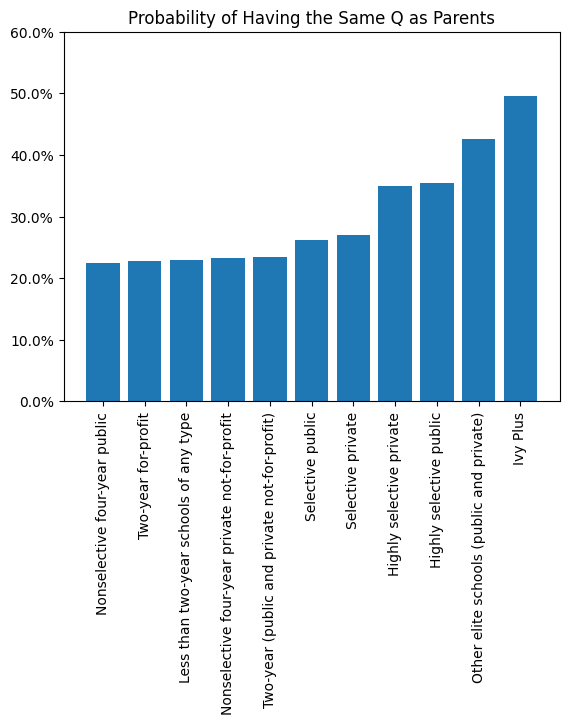

In [18]:
p_vals = t.tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
#valid = p_vals.loc[p_vals.p_val <= 0.05]
valid = p_vals
valid = valid.loc[valid.index.astype(str).str.contains("tier_name")]
valid.index = [x.split(".")[-1].split("]")[0]  for x in valid.index.astype(str)]
valid = valid["coef"].astype(str).astype(float)
valid = valid + p_vals["coef"].astype(str).astype(float).iloc[0]
valid = valid.sort_values()

plt.bar(valid.index, valid)
ticks = plt.yticks()
plt.yticks(ticks[0], [f"{x:.1%}" for x in ticks[0]])

plt.xticks(rotation=90)
plt.title("Probability of Having the Same Q as Parents")

# Becoming an "Elite"

In [19]:
df = df.sort_values("tier", ascending=False)
t = smf.ols("mr_ktop1_pq1 ~ C(tier_name)", data=df).fit().summary()
t

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           mr_ktop1_pq1   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     68.36
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          9.02e-132
Time:                        18:31:28   Log-Likelihood:                 12306.
No. Observations:                2199   AIC:                        -2.459e+04
Df Residuals:                    2187   BIC:                        -2.452e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         0.0003      0.000      2.706      0.007     7.6e-05       0.000
C(tier_name)[T.Highly selective private]                          0.0010      0.000      6.749      0.000       0.001       0.001
C(tier_name)[T.Highly selective public]                           0.0016      0.000      8.035      0.000       0.001       0.002
C(tier_name)[T.Ivy Plus]                                          0.0045      0.000     16.006      0.000       0.004       0.005
C(tier_name)[T.Less than two-year schools of any type]            0.0002      0.000      1.252      0.211      -0.000       0.001
C(tier_name)[T.Nonselective four-year private not-for-profit]     0.0004      0.000      3.081      0.002       0.000       0.001
C(tier_name)[T.Nonselective four-year public]                   6.07e-05      0.000      0.415      0.678      -0.000       0.000
C(tier_name)[T.Other elite schools (public and private)]          0.0021      0.000     13.944      0.000       0.002       0.002
C(tier_name)[T.Selective private]                                 0.0003      0.000      2.389      0.017    4.65e-05       0.000
C(tier_name)[T.Selective public]                                  0.0003      0.000      2.814      0.005    9.55e-05       0.001
C(tier_name)[T.Two-year (public and private not-for-profit)]  -5.058e-05      0.000     -0.471      0.638      -0.000       0.000
C(tier_name)[T.Two-year for-profit]                           -5.096e-05      0.000     -0.346      0.729      -0.000       0.000
==============================================================================
Omnibus:                     1870.954   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64998.828
Skew:                           3.873   Prob(JB):                         0.00
Kurtosis:                      28.483   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

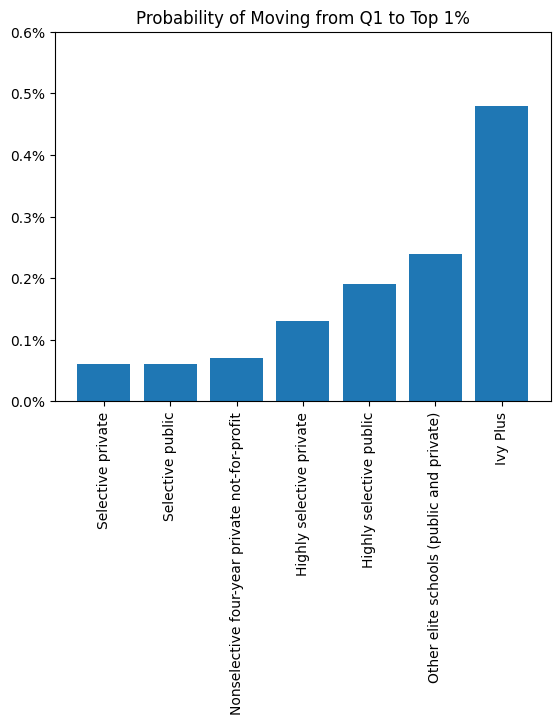

In [20]:
p_vals = t.tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
valid = p_vals.loc[p_vals.p_val <= 0.05]
valid = valid.loc[valid.index.astype(str).str.contains("tier_name")]
valid.index = [x.split(".")[-1].split("]")[0]  for x in valid.index.astype(str)]
#valid.index = valid.index.str.replace("1", "Northeast").str.replace("3", "South").str.replace("4", "West")
valid = valid["coef"].astype(str).astype(float)
valid = valid + p_vals["coef"].astype(str).astype(float).iloc[0]
valid = valid.sort_values()

plt.bar(valid.index, valid)
plt.xticks(rotation=90)
ticks = plt.yticks()
plt.yticks(ticks[0], [f"{x:.1%}" for x in ticks[0]])
plt.title("Probability of Moving from Q1 to Top 1%")
pass

# What About Marriage?

In [21]:
top_married = df.sort_values(by=['k_married'],ascending=False)[["name","k_married","tier_name"]]
top_married["k_married"] = top_married["k_married"].apply(lambda x: "{:.1%}".format(x))
top_married.head(10)

,name,k_married,tier_name
1863,United Talmudical Seminary,94.2%,Nonselective four-year private not-for-profit
149,Beth Medrash Govoha Of America,86.6%,Nonselective four-year private not-for-profit
199,Brigham Young University-Idaho,84.7%,Nonselective four-year private not-for-profit
349,Cincinnati Christian University,84.6%,Nonselective four-year private not-for-profit
197,Brigham Young University,84.5%,Selective private
176,Bluffton University,83.6%,Selective private
962,Lancaster Bible College,82.8%,Nonselective four-year private not-for-profit
112,Baptist Bible College,82.7%,Nonselective four-year private not-for-profit
1861,Union University,82.6%,Selective private
825,Huntington University,82.4%,Selective private


In [22]:
top_married.groupby("tier_name").get_group("Other elite schools (public and private)").head(5)  #the code to play around

,name,k_married,tier_name
1964,University Of Notre Dame,67.5%,Other elite schools (public and private)
1520,Rose - Hulman Institute Of Technology,67.4%,Other elite schools (public and private)
1975,University Of Richmond,66.7%,Other elite schools (public and private)
2075,Washington And Lee University,66.0%,Other elite schools (public and private)
2062,Wake Forest University,66.0%,Other elite schools (public and private)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              k_married   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     429.7
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.48e-87
Time:                        18:31:28   Log-Likelihood:                 1566.2
No. Observations:                2199   AIC:                            -3128.
Df Residuals:                    2197   BIC:                            -3117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4438      0.005     92.520      0.000       0.434       0.453
par_q5         0.3238      0.016     20.730      0.000       0.293       0.354
==============================================================================
Omnibus:                        2.328   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                2.358
Skew:                          -0.079   Prob(JB):                        0.308
Kurtosis:                       2.969   Cond. No.                         6.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

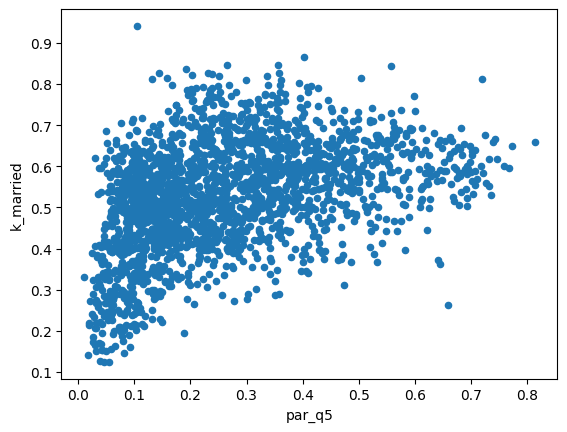

In [23]:
regression = smf.ols('k_married  ~  par_q5' , data=df).fit()
df.plot.scatter(x='par_q5', y='k_married')
regression.summary()

In [24]:
top_married.groupby("tier_name").get_group("Ivy Plus").head(15)  #the code to play around

,name,k_married,tier_name
549,Duke University,60.1%,Ivy Plus
1451,Princeton University,59.5%,Ivy Plus
1967,University Of Pennsylvania,58.6%,Ivy Plus
474,Cornell University,58.3%,Ivy Plus
506,Dartmouth College,56.9%,Ivy Plus
1082,Massachusetts Institute Of Technology,55.6%,Ivy Plus
2190,Yale University,55.1%,Ivy Plus
1745,Stanford University,54.6%,Ivy Plus
773,Harvard University,53.3%,Ivy Plus
207,Brown University,53.0%,Ivy Plus


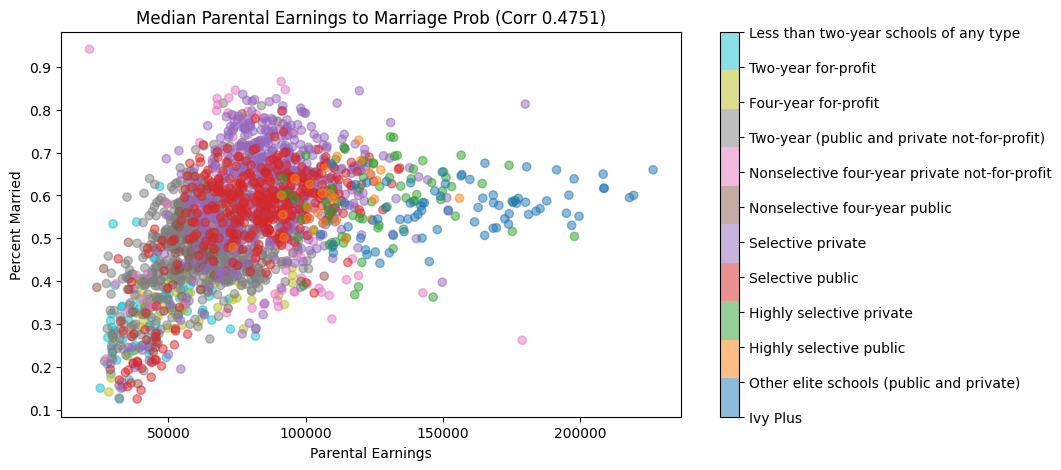

In [25]:
corr = df["par_median"].corr(df["k_married"])
fig, ax = plt.subplots(figsize=[10, 5])
scatter = plt.scatter(df.par_median, df.k_married, c=df.tier, cmap="tab10", alpha=0.5)
cbar = plt.colorbar()
t = df[["tier", "tier_name"]].drop_duplicates().sort_values("tier")
cbar.set_ticks(t.tier)
cbar.set_ticklabels(t.tier_name)
plt.xlabel("Parental Earnings")
plt.ylabel("Percent Married")
plt.title(f"Median Parental Earnings to Marriage Prob (Corr {corr:.4f})")

In [37]:
from ipywidgets import interact, widgets

word_list = list(df.name)

def autocomplete_word(prefix):
    completions = [word for word in word_list if prefix.lower() in word.lower()]
    return completions

# Create the interact function with the text input widget
@interact
def autocomplete_widget(prefix=widgets.Text()):
    completions = autocomplete_word(prefix)
    if completions:
        t = top_married.loc[top_married.name.isin(completions)].head(15)
        for row in t.itertuples():
            print(f"{row.name:40}, {row.k_married}, {row.tier_name}")
        
    else:
        print("No suggestions available for the given prefix.")

interactive(children=(Text(value='', description='prefix'), Output()), _dom_classes=('widget-interact',))